### Import modules

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### import Dataset

In [2]:
# Loading data from excel file
df=pd.read_excel('Data_Train.xlsx',sheet_name='Sheet1')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
 # checking data info which gives us the information about number of values present in each column and data type of each column
 # we observad that we have all the columns as object data type and only price column is of integer type   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# checkinh null values count
df.isnull().sum()
# we have 1 missing values in route column and 1 missing value in total stops column.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# creating list of category column
category=['Airline','Source','Destination','Additional_Info']

In [6]:
# checking unique values in all Coumns in category
for i in category:
    print(i,df[i].unique())
    print('-------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
-------------


In [7]:
# treating the date column
df.Date_of_Journey=df.Date_of_Journey.str.split('/')
df.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [8]:
df['Date']=df.Date_of_Journey.str[0]
df['Month']=df.Date_of_Journey.str[1]
df['Year']=df.Date_of_Journey.str[2]

In [9]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [10]:
df.Route=df.Route.str.split("→")

In [11]:
df['City1']=df.Route.str[0]
df['City2']=df.Route.str[1]
df['City3']=df.Route.str[2]
df['City4']=df.Route.str[3]
df['City5']=df.Route.str[4]
df['City6']=df.Route.str[5]
#df['City']=df.Route.str[]

In [12]:
# Treating dep time column.
df.Dep_Time=df.Dep_Time.str.split(':')

In [13]:
df['Dep_Time_Hour']=df.Dep_Time.str[0]
df['Dep_Time_Min']=df.Dep_Time.str[1]

In [14]:
# Treating the arrival time column
df.Arrival_Time=df.Arrival_Time.str.split(' ')

In [15]:
df['Arrival_Date']=df.Arrival_Time.str[1]
df['Time_of_Arrival']=df.Arrival_Time.str[0]

In [16]:
df['Time_of_Arrival']=df.Time_of_Arrival.str.split(':')

In [17]:
df['Arrival_Time_Hour']=df.Time_of_Arrival.str[0]
df['Arrival_Time_Min']=df.Time_of_Arrival.str[1]

In [18]:
# treating the Duration column
df.Duration=df.Duration.str.split(' ')

In [19]:
df['Travel_hours']=df.Duration.str[0]

In [20]:
df['Travel_hours']=df['Travel_hours'].str.split('h')

In [21]:
df['Travel_hours']=df['Travel_hours'].str[0]

In [22]:
df.Travel_hours=df.Travel_hours

In [23]:
df['Travel_min']=df.Duration.str[1]

In [24]:
df['Travel_min']=df['Travel_min'].str.split('m')

In [25]:
df['Travel_min']=df['Travel_min'].str[0]

In [26]:
# Treating the total stops colum
df.Total_Stops.replace('non-stop','0',inplace=True)

In [27]:
df.Total_Stops=df.Total_Stops.str.split(' ')

df.Total_Stops=df.Total_Stops.str[0]

In [28]:
# Exploring the Additional info column.
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
df.Additional_Info.replace('No Info','No Info',inplace=True)

In [30]:
# Due to multiple column splitting ,we introduced NaN values in our data, checking number of NAN values
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_Date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_min            1032
dtype: int64

In [31]:
# we droping high missing values column
df.drop(columns=['City5','City6','City4','Date_of_Journey','Route','Dep_Time','Duration','Time_of_Arrival'],inplace=True)

In [32]:
df[df['City1'].isnull()]

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_min
9039,Air India,Delhi,Cochin,"[09:25, 07, May]",NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09,25,23,40


In [33]:
df['City1'].replace(['NaN'],'DEL',inplace=True)

In [34]:
df['City1'].fillna(df['City1'].mode()[0],inplace=True)
df['City2'].fillna(df['City2'].mode()[0],inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)
#df['Route'].fillna(df['Route'].mode()[0],inplace=True)

In [35]:
# filling city3 as None,sine the missing values are less we will assign a separate category to this column as None.
df['City3'].fillna('None',inplace=True)

In [36]:
# Filling the null values in Arrival data with values in Departure date since the Nan values are those dates 
#which departed and arrived on the same date
df['Arrival_Date'].fillna(df['Date'],inplace=True)

In [37]:
# filling Nan values in Travel mins as 0 sine the minutes data is not valid for these (reached in hour units)
df['Travel_min'].fillna(0,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Arrival_Time       10683 non-null  object
 4   Total_Stops        10683 non-null  object
 5   Additional_Info    10683 non-null  object
 6   Price              10683 non-null  int64 
 7   Date               10683 non-null  object
 8   Month              10683 non-null  object
 9   Year               10683 non-null  object
 10  City1              10683 non-null  object
 11  City2              10683 non-null  object
 12  City3              10683 non-null  object
 13  Dep_Time_Hour      10683 non-null  object
 14  Dep_Time_Min       10683 non-null  object
 15  Arrival_Date       10683 non-null  object
 16  Arrival_Time_Hour  10683 non-null  objec

In [39]:
df[df['Travel_hours']=='5m']

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_min
6474,Air India,Mumbai,Hyderabad,[16:55],2,No info,17327,6,03,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [40]:
# The data seems to be invalid sincde the flight from mumbai to hyd cannot be for 5 minutes.Hence dropping this row .
df.drop(index=6474,inplace=True,axis=0)

In [41]:
# chaging data type of numerical columns from object to int 
df.Total_Stops=df.Total_Stops.astype('int64')
df.Date=df.Date.astype("int64")
df.Month=df.Month.astype('int64')
df.Year=df.Year.astype('int64')

df.Dep_Time_Hour=df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min=df.Dep_Time_Min.astype('int64')

df.Arrival_Date=df.Arrival_Date.astype('int64')
df.Arrival_Time_Hour=df.Arrival_Time_Hour.astype('int64')
df.Arrival_Time_Min=df.Arrival_Time_Min.astype('int64')

df.Travel_hours=df.Travel_hours.astype('int64')

df.Travel_min=df.Travel_min.astype('int64')

In [42]:
# creating list of different types of columns
categorical=['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_Date',
           'Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_min']

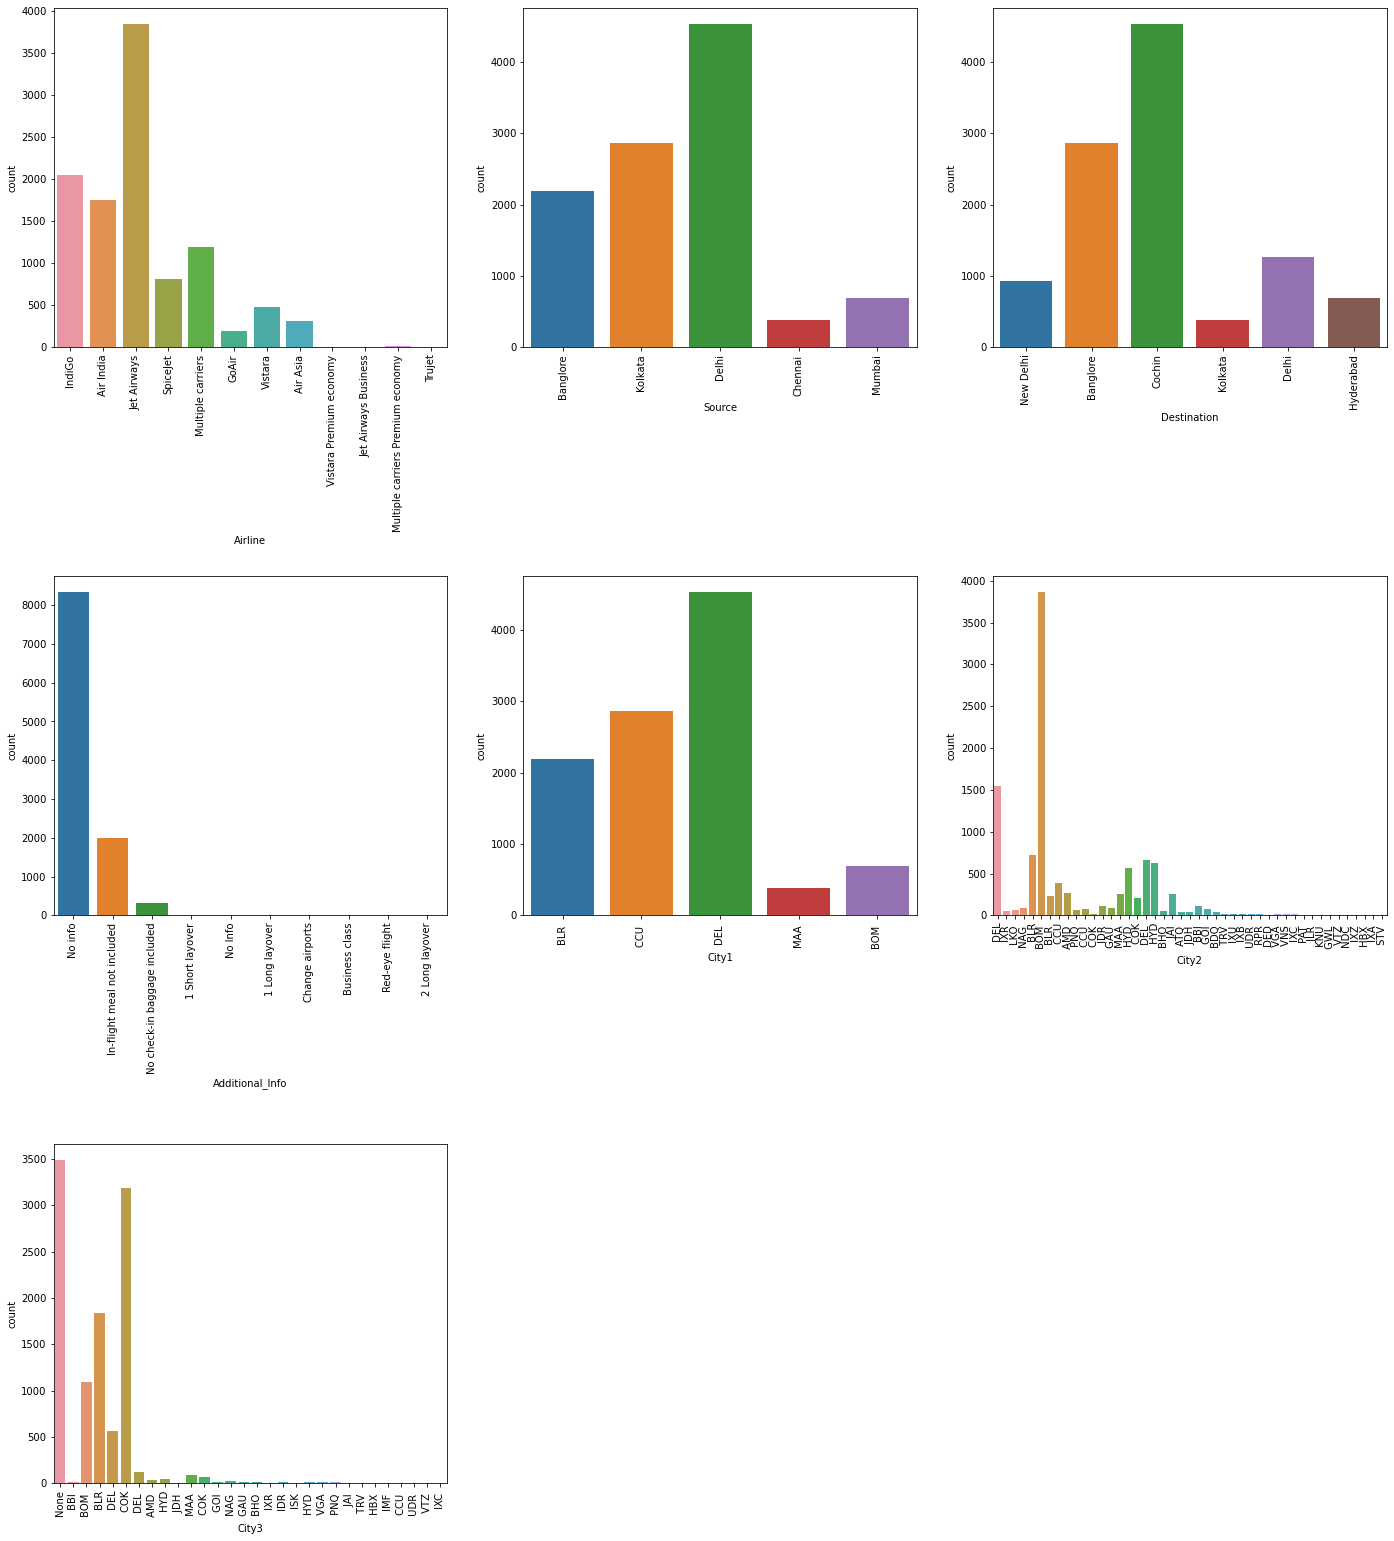

In [43]:
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()
#We now plot countplot to check the overall categorical data performance.
#Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia

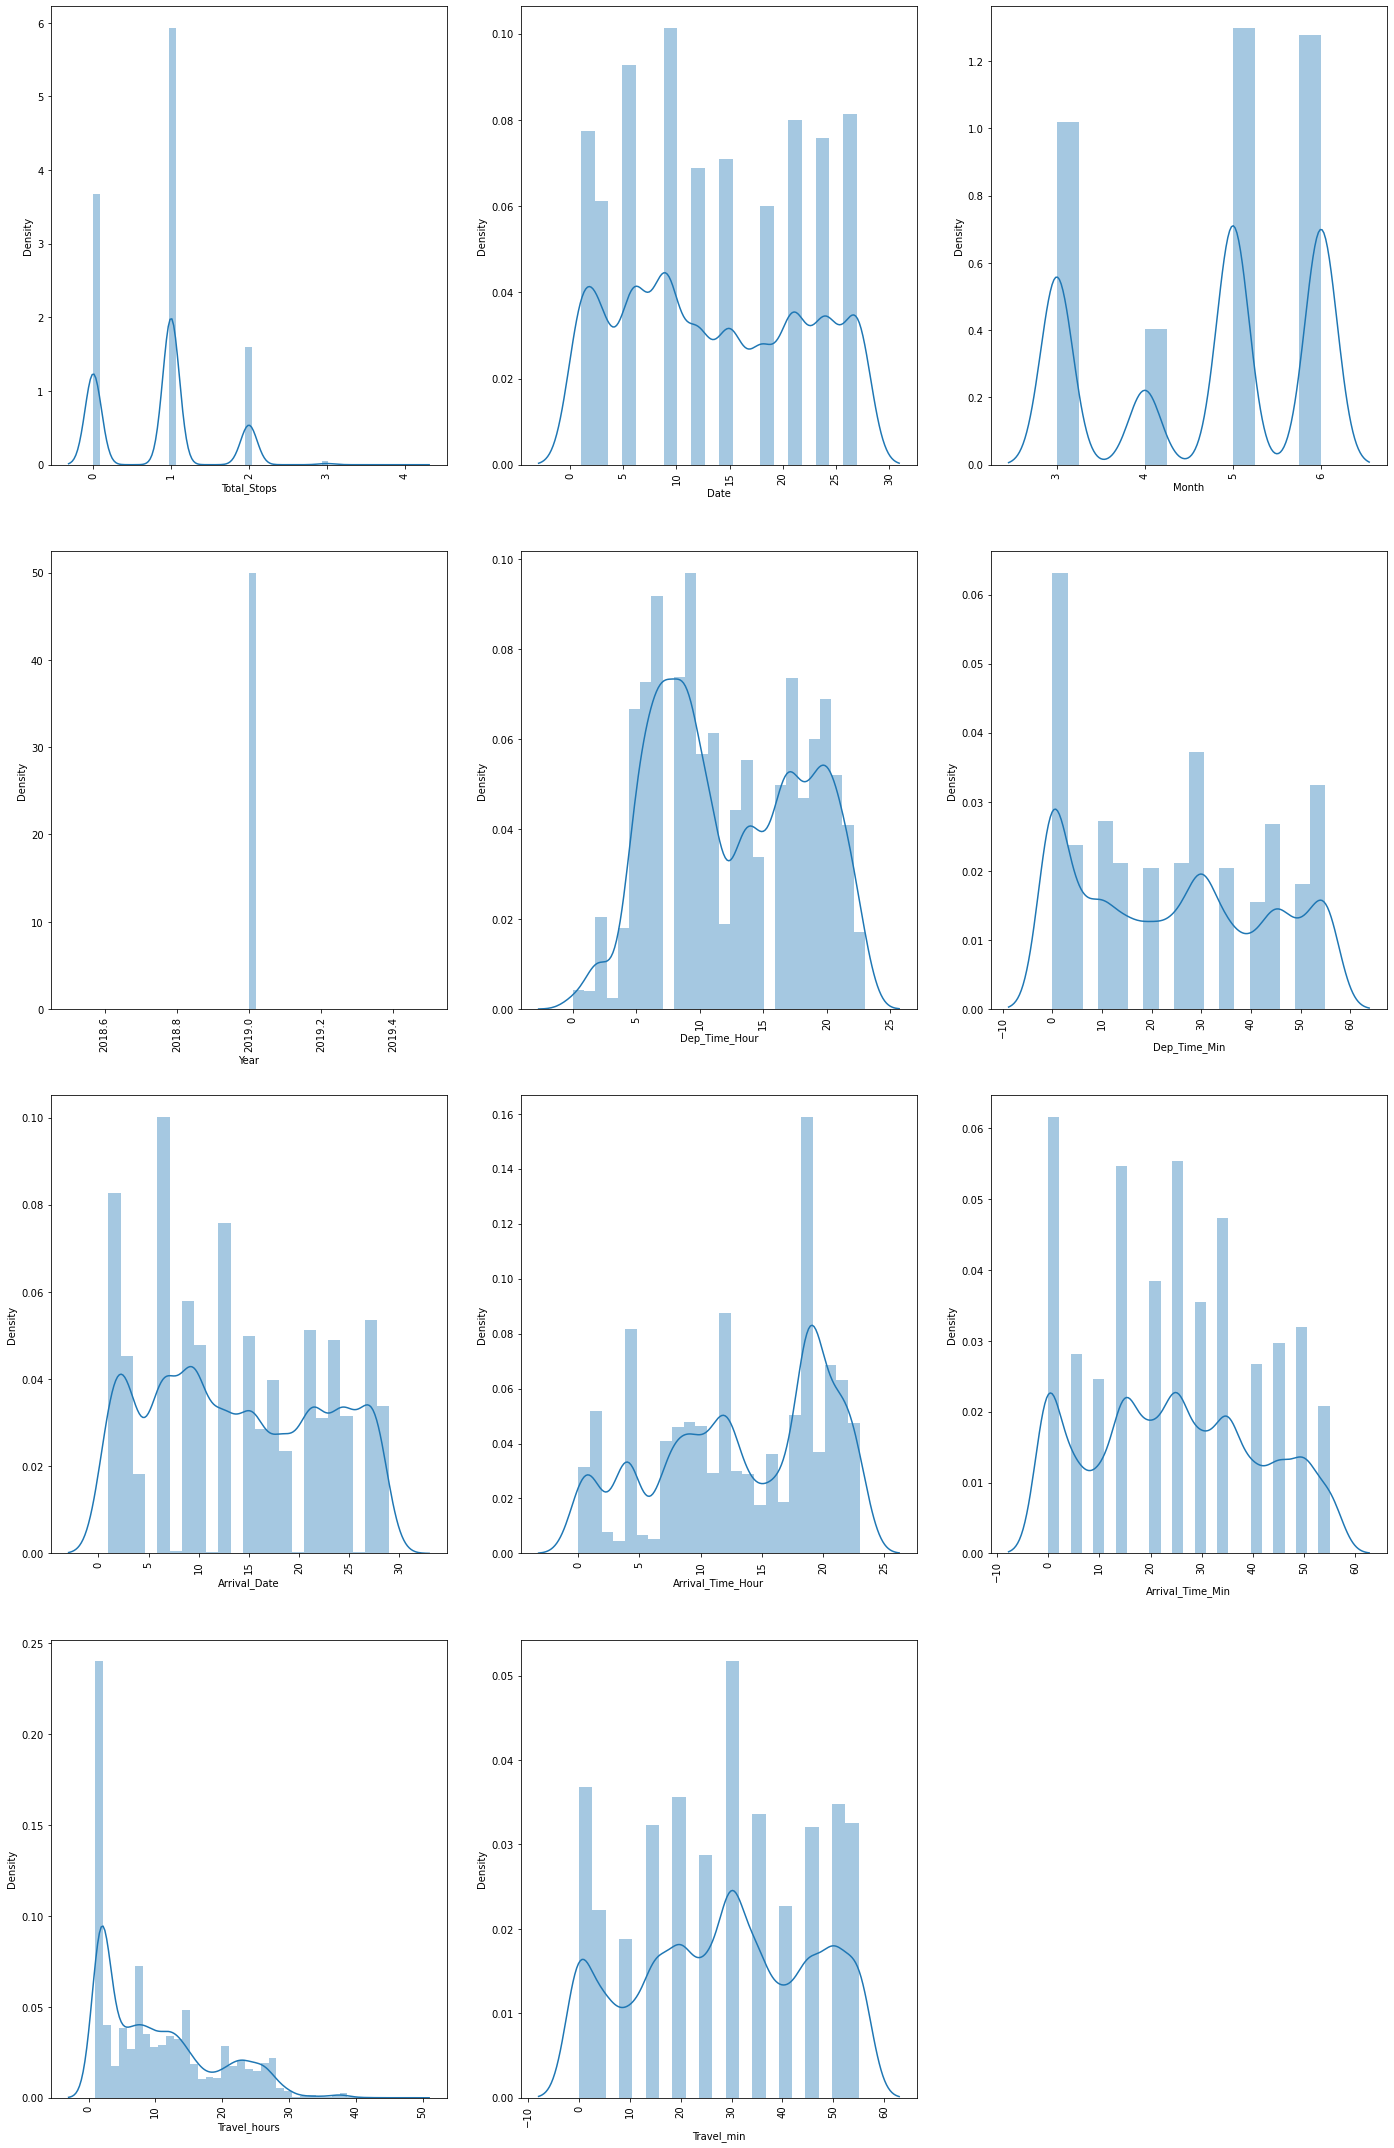

In [44]:
c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()
#We now plot distribution plots to check the distribution in numerical data

<AxesSubplot:xlabel='Price', ylabel='Density'>

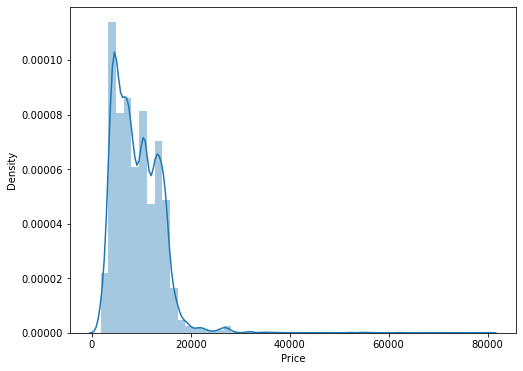

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(df.Price)

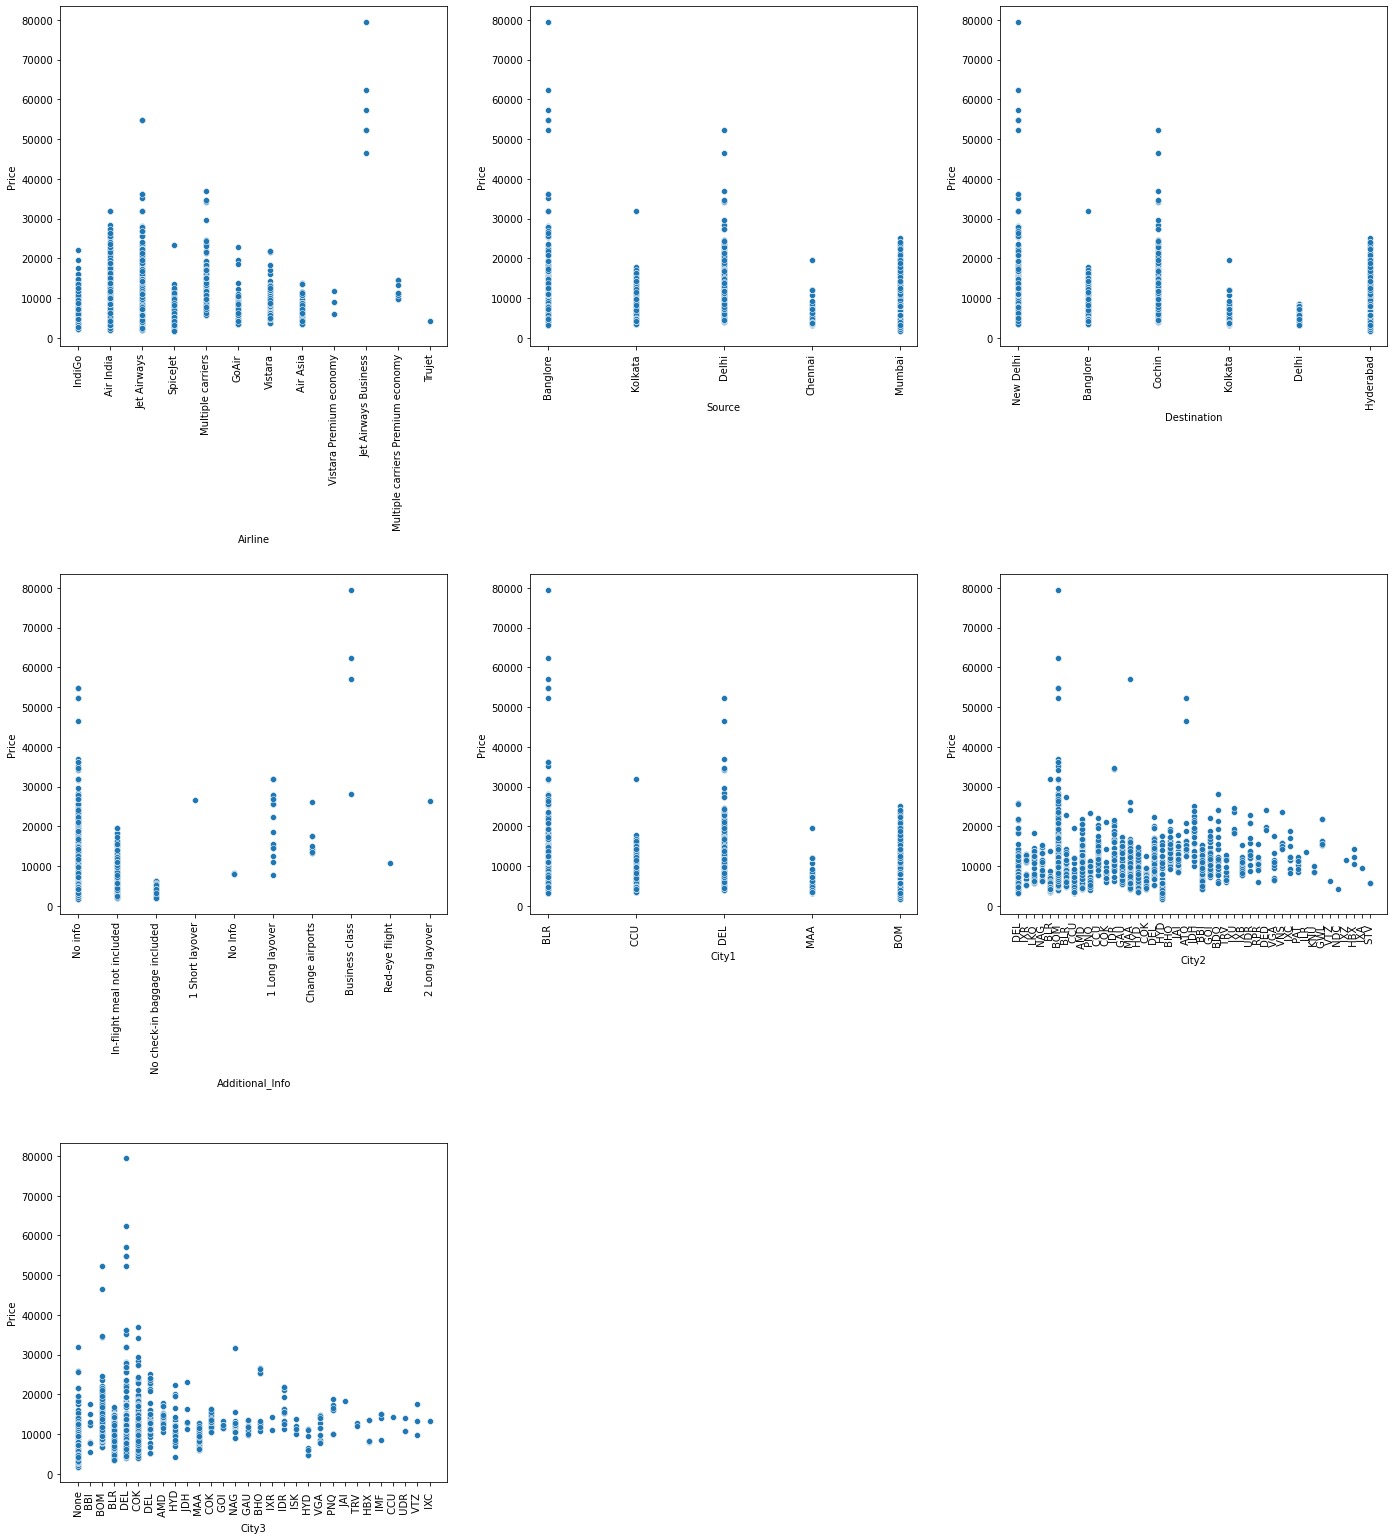

In [46]:
# We now proceed with checking the relation of ‘Price’ column with numerical data
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

In [47]:
# checking flights with high price
df[df.Price>=50000]

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_min
657,Jet Airways Business,Banglore,New Delhi,[10:45],1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,1,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,"[00:45, 16, Mar]",1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,"[05:05, 16, Mar]",1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,[11:25],1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,1,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,[12:25],1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,1,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,[23:00],1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,1,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,"[04:25, 07, Mar]",2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,7,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,[14:25],1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,1,14,25,4,40


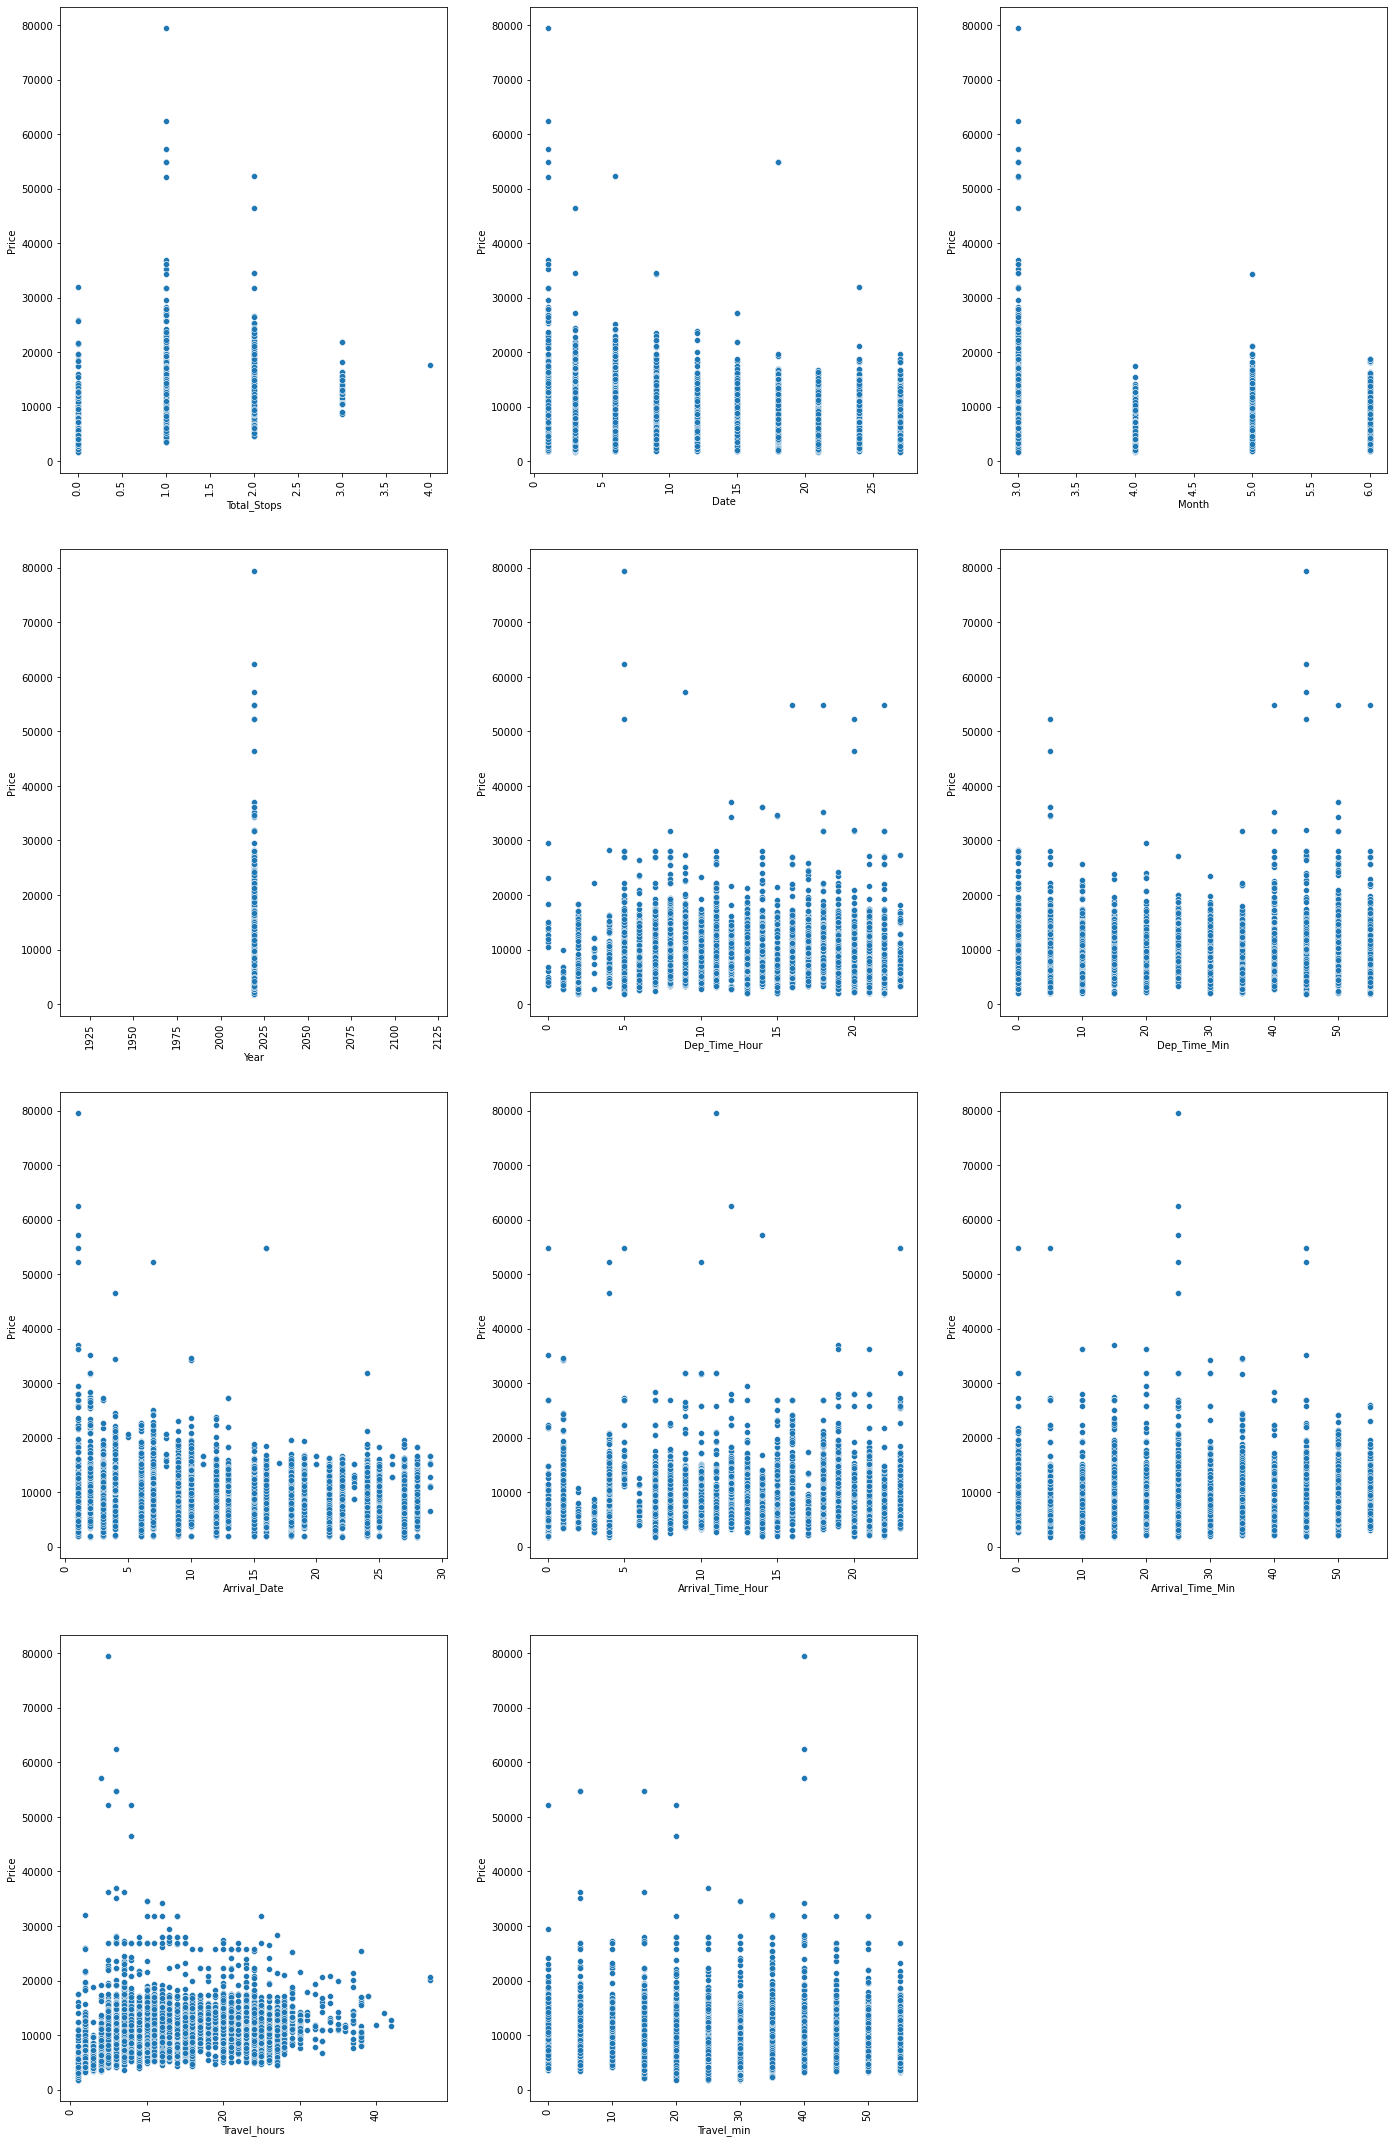

In [48]:
c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i],y=df.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()
# We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.

### Outlier Detection

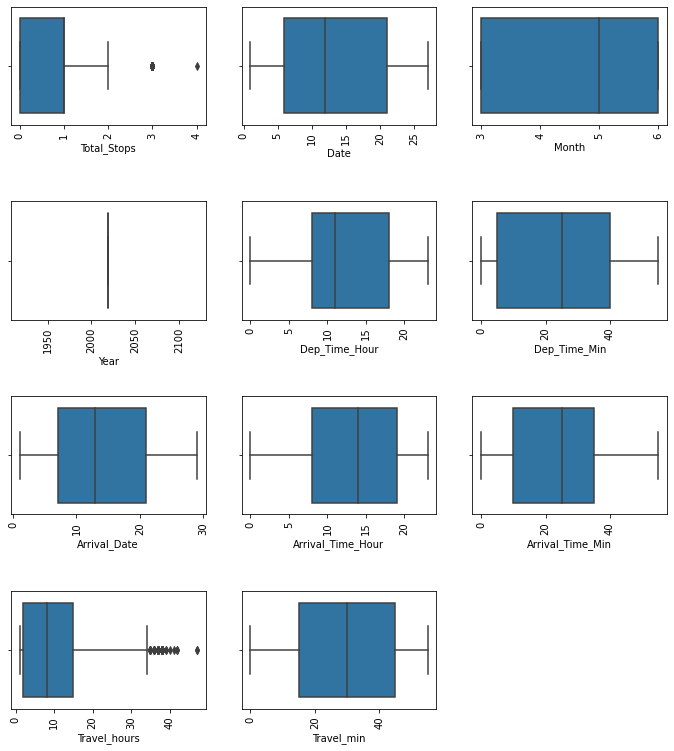

In [49]:
c=1
plt.figure(figsize=(10,16))

for i in numerical:
    plt.subplot(6,3,c)
    sns.boxplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

In [50]:
df.skew()

Total_Stops          0.317164
Price                1.813248
Date                 0.118174
Month               -0.387708
Year                 0.000000
Dep_Time_Hour        0.113224
Dep_Time_Min         0.167210
Arrival_Date         0.119667
Arrival_Time_Hour   -0.369876
Arrival_Time_Min     0.110928
Travel_hours         0.850822
Travel_min          -0.091004
dtype: float64

In [51]:
# Using Log Transform to trat skewness in the data
df.Travel_hours=np.log(df.Travel_hours)

In [52]:
df.Travel_hours.skew()

-0.26612233332369917

In [53]:
df.drop('Arrival_Time',axis=1,inplace=True)

### Encoding the categorical Data

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        df[i]=le.fit_transform(df[i])

Airline
Source
Destination
Additional_Info
City1
City2
City3


### Train Test Split:# Dividing the dataset into independent and dependent data before scaling

In [56]:
ds_x=df.drop('Price',axis=1)
y=df.Price

### Scaling the Data

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset=sc.fit_transform(ds_x)

x=pd.DataFrame(dataset,columns=ds_x.columns)

### Fitting the Regression Model

In [58]:
# Importing the machine learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [59]:
# Creating object for the data modules.
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

for i in [svr,dt,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score) <=0.1:
        print(i)
        print("---------")
        print("R2 Score is ",r2_score(y_test,pred))
        print('R2 for train data ',r2_score(y_train,i.predict(x_train)))
        print('Mean absolute Error is ',mean_absolute_error(y_test,pred))
        print('Mean squared Error is ',mean_squared_error(y_test,pred))
        print('Root Mean Squared Error is ',(mean_squared_error(y_test,pred,squared=False)))
        print('*****************')

SVR()
---------
R2 Score is  0.04470794296326408
R2 for train data  0.039229570599226826
Mean absolute Error is  3407.1843799205726
Mean squared Error is  19337948.576364327
Root Mean Squared Error is  4397.493442446996
*****************
KNeighborsRegressor()
---------
R2 Score is  0.8137408898366288
R2 for train data  0.8333575745592783
Mean absolute Error is  1159.549953198128
Mean squared Error is  3770437.603544462
Root Mean Squared Error is  1941.7614692707398
*****************
LinearRegression()
---------
R2 Score is  0.5200665164585296
R2 for train data  0.4954441287673136
Mean absolute Error is  2247.970500795531
Mean squared Error is  9715279.171889367
Root Mean Squared Error is  3116.93425851258
*****************


### Ensemble Models

In [61]:
# Now Use Ensemble Models to check if our Performance improving using ensemble models.
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [62]:
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

In [63]:
for i in [adr,rfr,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score) <=0.1:
        print(i)
        print("---------")
        print("R2 Score is ",r2_score(y_test,pred))
        print('R2 for train data ',r2_score(y_train,i.predict(x_train)))
        print('Mean absolute Error is ',mean_absolute_error(y_test,pred))
        print('Mean squared Error is ',mean_squared_error(y_test,pred))
        print('Root Mean Squared Error is ',(mean_squared_error(y_test,pred,squared=False)))
        print('*****************')

GradientBoostingRegressor()
---------
R2 Score is  0.8486536962647078
R2 for train data  0.8370938644759212
Mean absolute Error is  1236.0106278811998
Mean squared Error is  3063698.705853837
Root Mean Squared Error is  1750.342453879765
*****************


### Cross Validation:

In [64]:
#Importing cross val score from model_selection
from sklearn.model_selection import cross_val_score

In [65]:
# cross validation score for AdaBoostRegressor
rftscore=cross_val_score(adr,x,y,cv=5)
rfc=rftscore.mean()
print("Cross val Score :",rfc*100)

Cross val Score : 30.703613261182728


In [66]:
# cross validation score for SVRegressor
rftscore=cross_val_score(svr,x,y,cv=5)
rfc=rftscore.mean()
print("Cross val Score :",rfc*100)

Cross val Score : 4.57791750257268


In [67]:
# cross validation score for DecisionTreeRegressor
rftscore=cross_val_score(dt,x,y,cv=5)
rfc=rftscore.mean()
print("Cross val Score :",rfc*100)

Cross val Score : 81.68391593620991


In [68]:
#RandomForestRegrressor cross validation score
for i in range(2,9):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.8613918738450069
RandomForestRegressor() 0.8666992986687533
RandomForestRegressor() 0.8765953163989735
RandomForestRegressor() 0.8884064034039018
RandomForestRegressor() 0.8871581913246324
RandomForestRegressor() 0.8857903902755535
RandomForestRegressor() 0.8865079950825283


In [69]:
#cross validation score for GradientBoostingRegressor
for i in range(2,4):
    cv=cross_val_score(gbr,x,y,cv=i)
    print(gbr,cv.mean())

GradientBoostingRegressor() 0.8202779409870364
GradientBoostingRegressor() 0.8226637936195685


### Hypertuning the Model

In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


parameters={'kernel':['linear','poly','rbf'],'gamma':['auto','scale']}

svr=SVR() 

clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'gamma': 'auto', 'kernel': 'linear'}
Best R2 Score : 0.4285155950056841


In [71]:
parameters={'n_neighbors':[5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}  
knr=KNeighborsRegressor()  

clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best R2 Score : 0.7746997158710831


In [72]:
from sklearn.ensemble import AdaBoostRegressor

parameters={'n_estimators':[50],'loss':['linear','square','exponential']}

ad=AdaBoostRegressor() 

clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'loss': 'square', 'n_estimators': 50}
Best R2 Score : 0.4025525869488014


In [73]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,20,40,60,70,80,100],'max_depth':[None,1,2,3],'max_samples':[50,100,250,500],
           'min_samples_split':[2,4,10]}
gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)
# RandomForestRegressor

In [74]:
#Fitting the Model
res=gcv_rfr.fit(x_train,y_train)

In [75]:
# Checking best params
res.best_params_

{'max_depth': None,
 'max_samples': 500,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
# Creating model instance with best params
model=RandomForestRegressor(max_depth='None',max_samples=500,min_samples_split= 2,n_estimators= 60)

### Ensemble Method RandomForestRegressor: Model,GridSearchCV,Cross Validation Score

In [77]:
from sklearn.ensemble import RandomForestRegressor

parameters={'n_estimators':[100],'max_features':['auto','sqrt','log2']}

rfr=RandomForestRegressor() 

clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

best_result=clf.best_score_
print("Best R2 Score :",best_result)

{'max_features': 'sqrt', 'n_estimators': 100}
Best R2 Score : 0.872726067786975


In [78]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=100,max_features='auto')
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rftscore=cross_val_score(rfr,x,y,cv=5)
rfc=rftscore.mean()
print("Cross val Score :",rfc*100)

R2 Score : 88.01286699414477
Cross val Score : 88.60227013033389


In [79]:
import joblib
joblib.dump(rfr,'flight_price.obj')

['flight_price.obj']

In [80]:
#model=joblib.load('flight_price.obj')
pred=rfr.predict(x_test)
# Creating a dataframe with actual and predict values
predict_values=pd.DataFrame({'Actual':y_test,'Predicted':pred})
predict_values

,Actual,Predicted
6075,16655,16689.08
3544,4959,5469.54
9291,9187,9143.03
5032,3858,3819.75
2483,12898,12898.00
...,...,...
7918,14714,15764.42
5858,10844,10831.39
2689,5000,5900.45
4486,3100,3357.92


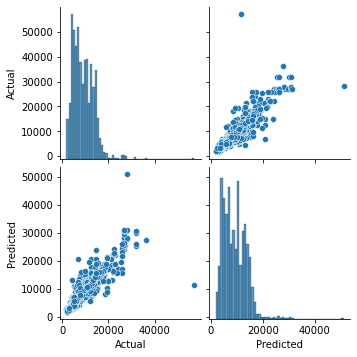

In [81]:
# This marks the end of our process
# we have successfully trained our model to predict the price of the flight ticket,with an accuracy of ~88%
sns.pairplot(predict_values)

### These are the predictions on the training data, but we also had a test file for which we need to predict the outputs.

In [82]:
# Loading testdataset from excel file
ds=pd.read_excel('Test_set.xlsx',sheet_name='Sheet1')
ds

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [83]:
ds.info()
# checking basic info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [84]:
ds.isnull().sum()
# we dont have missing values in dataset

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [85]:
# creating list of category column
category=['Airline','Source','Destination','Additional_Info']

### Exploratory Data analysis(EDA) in Test Data Set 

In [86]:
# checking unique values in all Coumns in category
for i in category:
    print(i,ds[i].unique())
    print('-------------')

Airline ['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
-------------
Source ['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
-------------
Destination ['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
-------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']
-------------


In [87]:
# treating the date column
ds.Date_of_Journey=ds.Date_of_Journey.str.split('/')
ds.Date_of_Journey

0        [6, 06, 2019]
1       [12, 05, 2019]
2       [21, 05, 2019]
3       [21, 05, 2019]
4       [24, 06, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 2671, dtype: object

In [88]:
ds['Date']=ds.Date_of_Journey.str[0]
ds['Month']=ds.Date_of_Journey.str[1]
ds['Year']=ds.Date_of_Journey.str[2]

In [89]:
ds.Route=ds.Route.str.split("→")

In [90]:
ds['City1']=ds.Route.str[0]
ds['City2']=ds.Route.str[1]
ds['City3']=ds.Route.str[2]
ds['City4']=ds.Route.str[3]
ds['City5']=ds.Route.str[4]
ds['City6']=ds.Route.str[5]

In [91]:
# Treating dep time column.
ds.Dep_Time=ds.Dep_Time.str.split(':')

In [92]:
ds['Dep_Time_Hour']=ds.Dep_Time.str[0]
ds['Dep_Time_Min']=ds.Dep_Time.str[1]

In [93]:
# Treating the arrival time column
ds.Arrival_Time=ds.Arrival_Time.str.split(' ')

In [94]:
ds['Arrival_Date']=ds.Arrival_Time.str[1]
ds['Time_of_Arrival']=ds.Arrival_Time.str[0]

In [95]:
ds['Time_of_Arrival']=ds.Time_of_Arrival.str.split(':')
ds['Arrival_Time_Hour']=ds.Time_of_Arrival.str[0]
ds['Arrival_Time_Min']=ds.Time_of_Arrival.str[1]

In [96]:
# treating the Duration column
ds.Duration=ds.Duration.str.split(' ')
ds['Travel_hours']=ds.Duration.str[0]

In [97]:
ds['Travel_hours']=ds['Travel_hours'].str.split('h')

In [98]:
ds['Travel_min']=ds.Duration.str[1]

In [99]:
ds.Travel_hours=ds.Travel_hours

In [100]:
ds['Travel_min']=ds.Duration.str[1]

In [101]:
ds['Travel_min']=ds['Travel_min'].str.split('m')

In [102]:
ds['Travel_min']=ds['Travel_min'].str[0]

In [103]:
# Treating the total stops colum
ds.Total_Stops.replace('non-stop','0',inplace=True)

In [104]:
ds.Total_Stops=ds.Total_Stops.str.split(' ')

ds.Total_Stops=ds.Total_Stops.str[0]

In [105]:
# Exploring the Additional info column.
ds.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [106]:
ds.Additional_Info.replace('No Info','No Info',inplace=True)

In [107]:
# Due to multiple column splitting ,we introduced NaN values in our data, checking number of NAN values
ds.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                 849
City4                2280
City5                2659
City6                2670
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_Date         1605
Time_of_Arrival         0
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_min            254
dtype: int64

In [108]:
# we droping high missing values column
ds.drop(columns=['City5','City6','City4','Date_of_Journey','Route','Dep_Time','Duration','Time_of_Arrival'],inplace=True)

In [109]:
ds[ds['City1'].isnull()]

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_min


In [110]:
ds['City1'].fillna(ds['City1'].mode()[0],inplace=True)
ds['City2'].fillna(ds['City2'].mode()[0],inplace=True)
ds['Total_Stops'].fillna(ds['Total_Stops'].mode()[0],inplace=True)
#ds['Route'].fillna(ds['Route'].mode()[0],inplace=True)

In [111]:
# filling city3 as None,sine the missing values are less we will assign a separate category to this column as None.
ds['City3'].fillna('None',inplace=True)

In [112]:
ds['Arrival_Date'].mode()
#filling missing values with no of repated Date values.

0    07
dtype: object

In [113]:
# Filling the null values in Arrival data with values in Departure date since the Nan values are those dates 
#which departed and arrived on the same date
#ds['Arrival_Date'].fillna(ds['Date'],inplace=True)
ds['Arrival_Date'].fillna(ds['Arrival_Date'].mode()[0],inplace=True)

In [114]:
# filling Nan values in Travel mins as 0 sine the minutes data is not valid for these (reached in hour units)
ds['Travel_min'].fillna(0,inplace=True)

In [115]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2671 non-null   object
 1   Source             2671 non-null   object
 2   Destination        2671 non-null   object
 3   Arrival_Time       2671 non-null   object
 4   Total_Stops        2671 non-null   object
 5   Additional_Info    2671 non-null   object
 6   Date               2671 non-null   object
 7   Month              2671 non-null   object
 8   Year               2671 non-null   object
 9   City1              2671 non-null   object
 10  City2              2671 non-null   object
 11  City3              2671 non-null   object
 12  Dep_Time_Hour      2671 non-null   object
 13  Dep_Time_Min       2671 non-null   object
 14  Arrival_Date       2671 non-null   object
 15  Arrival_Time_Hour  2671 non-null   object
 16  Arrival_Time_Min   2671 non-null   object


In [116]:
ds[ds['Travel_hours']=='5m'].index
# 2660

Int64Index([], dtype='int64')

In [118]:
# The data seems to be invalid sincde the flight from mumbai to hyd cannot be for 5 minutes.Hence dropping this row .
ds.drop(index=2660,inplace=True,axis=0)

In [119]:
ds.isnull().sum()
# now our dataset dont have any missing values.

Airline              0
Source               0
Destination          0
Arrival_Time         0
Total_Stops          0
Additional_Info      0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_Date         0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_hours         0
Travel_min           0
dtype: int64

### Encoding the categorical Data

In [121]:
objList = ds.select_dtypes(include = "object").columns
print (objList)

Index(['Airline', 'Source', 'Destination', 'Arrival_Time', 'Additional_Info',
       'City1', 'City2', 'City3', 'Travel_hours', 'Travel_min'],
      dtype='object')


In [122]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    ds[feat] = le.fit_transform(ds[feat].astype(str))
    
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Airline            2670 non-null   int32
 1   Source             2670 non-null   int32
 2   Destination        2670 non-null   int32
 3   Arrival_Time       2670 non-null   int32
 4   Total_Stops        2670 non-null   int64
 5   Additional_Info    2670 non-null   int32
 6   Date               2670 non-null   int64
 7   Month              2670 non-null   int64
 8   Year               2670 non-null   int64
 9   City1              2670 non-null   int32
 10  City2              2670 non-null   int32
 11  City3              2670 non-null   int32
 12  Dep_Time_Hour      2670 non-null   int64
 13  Dep_Time_Min       2670 non-null   int64
 14  Arrival_Date       2670 non-null   int64
 15  Arrival_Time_Hour  2670 non-null   int64
 16  Arrival_Time_Min   2670 non-null   int64
 17  Travel_hours  

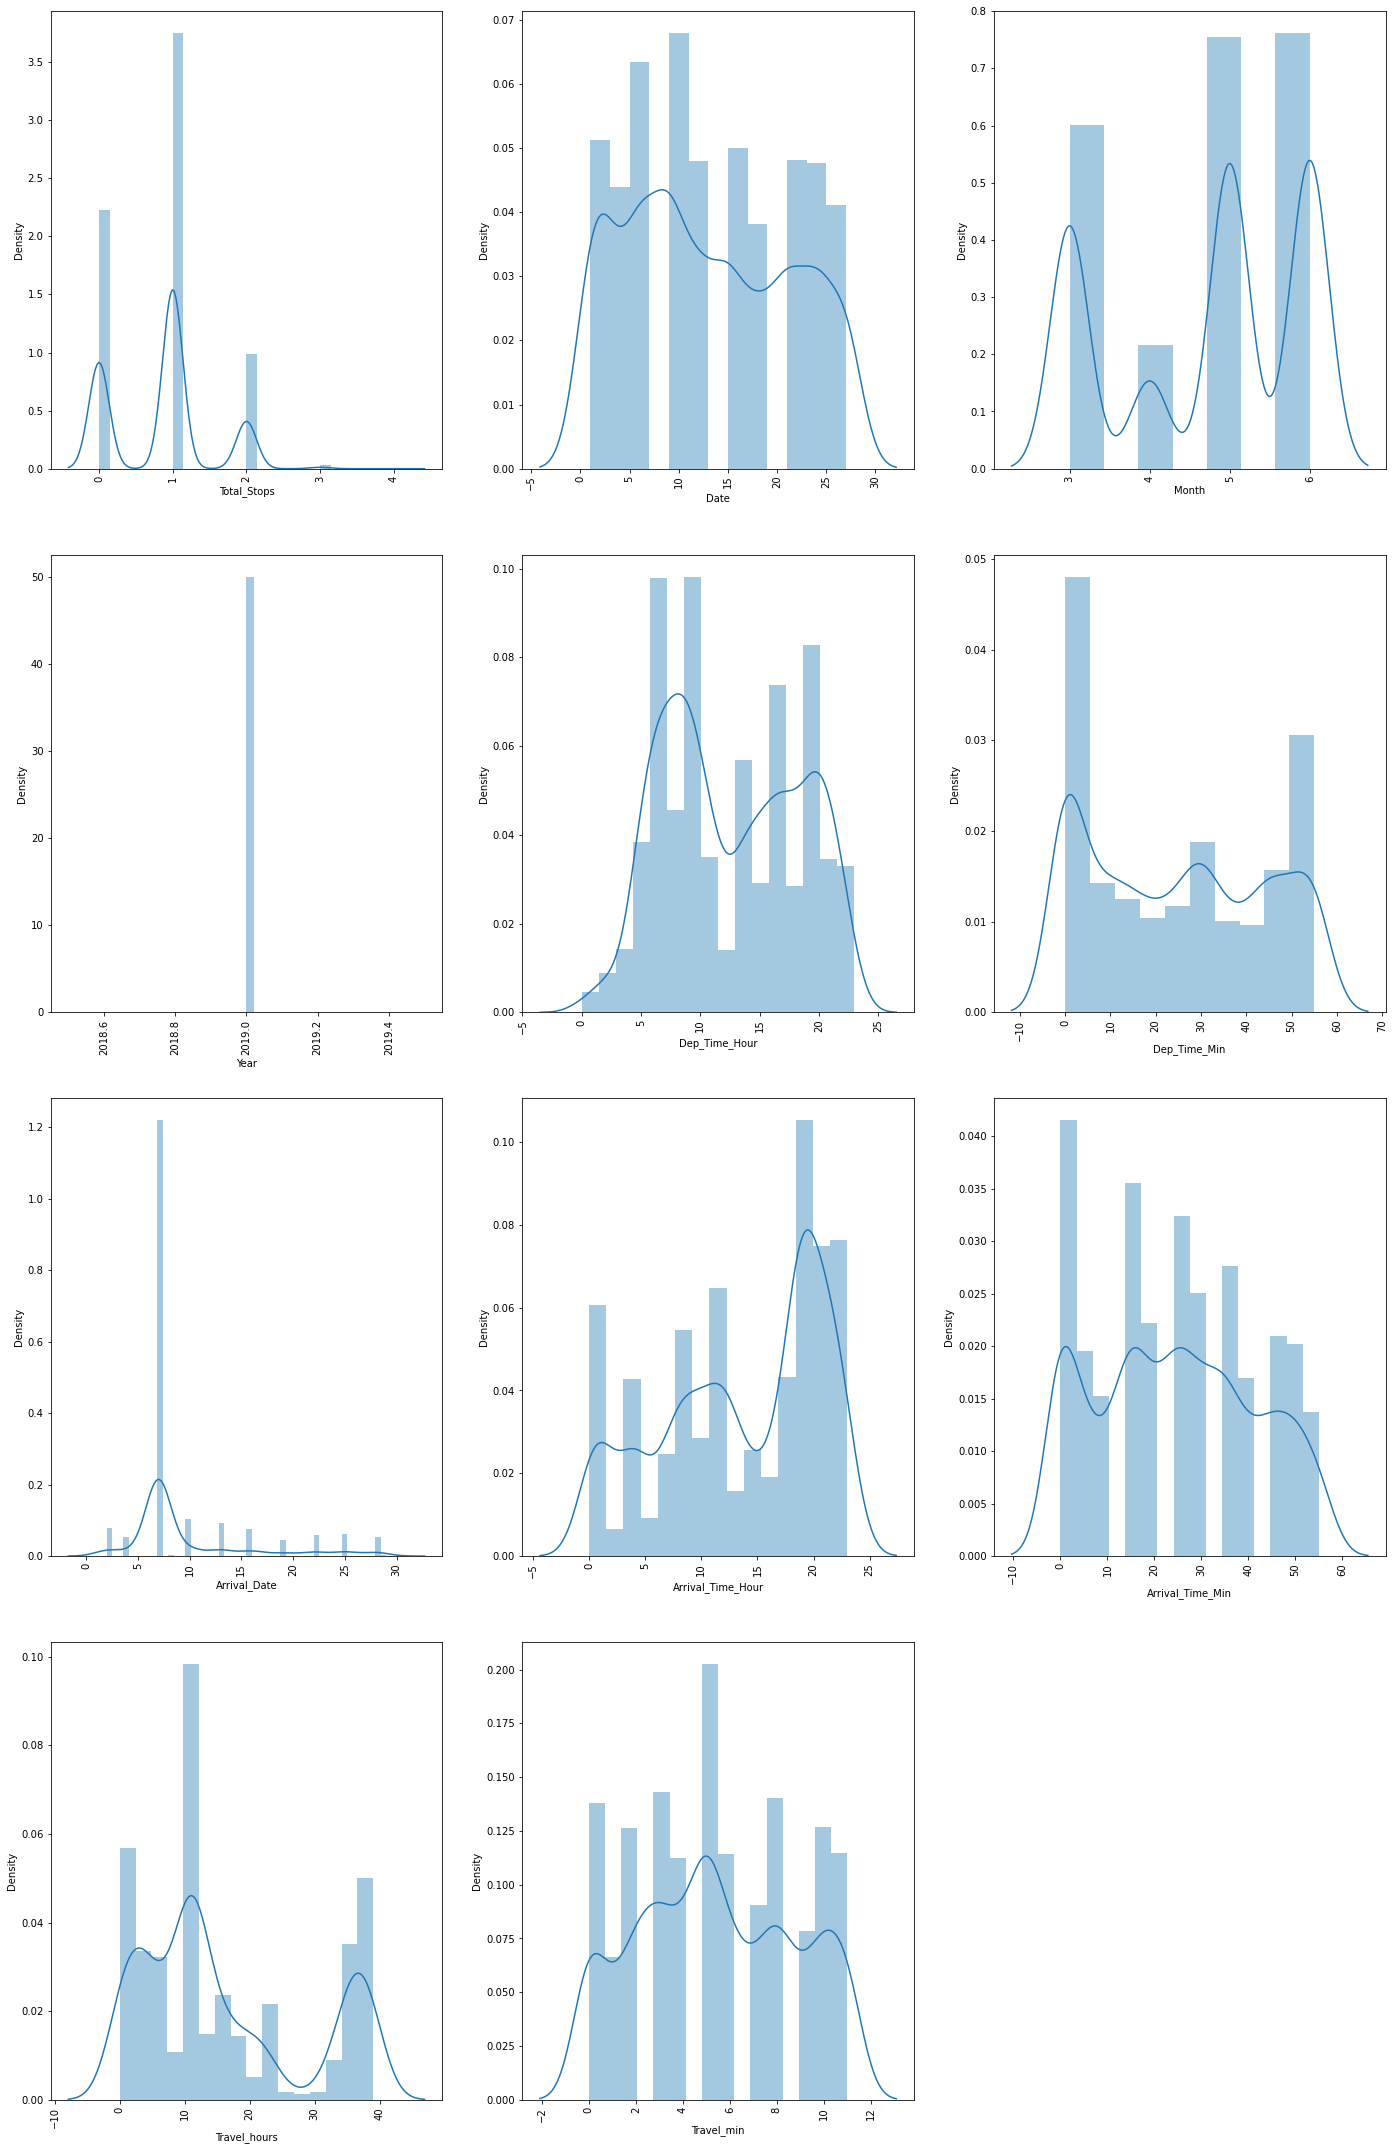

In [123]:
# We now plot distribution plots to check the distribution in numerical data
c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(ds[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

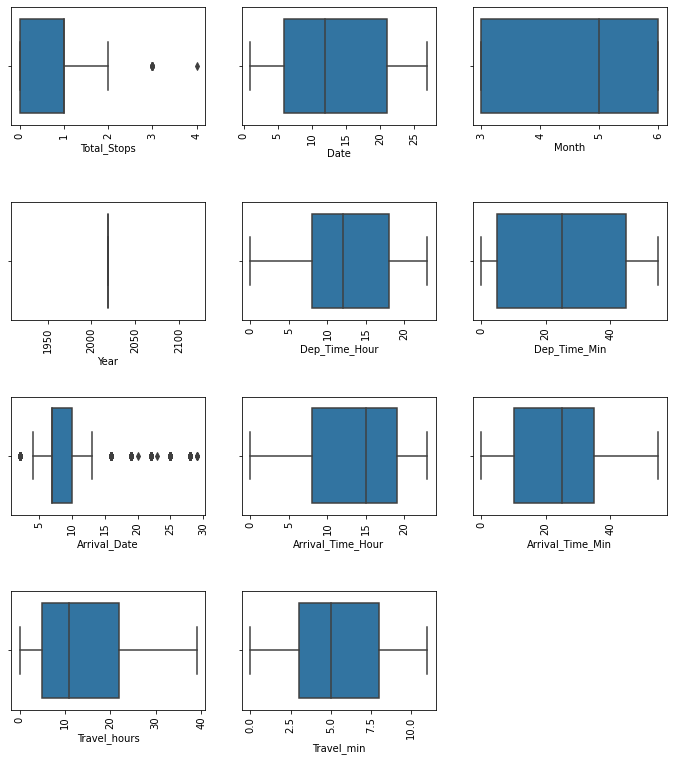

In [124]:
c=1
plt.figure(figsize=(10,16))

for i in numerical:
    plt.subplot(6,3,c)
    sns.boxplot(ds[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

In [125]:
ds.skew()

Airline              0.483606
Source              -0.425604
Destination          1.264947
Arrival_Time        -0.528394
Total_Stops          0.321839
Additional_Info     -1.718522
Date                 0.199380
Month               -0.404578
Year                 0.000000
City1               -0.623306
City2                1.182681
City3                0.679987
Dep_Time_Hour        0.094352
Dep_Time_Min         0.129241
Arrival_Date         1.771568
Arrival_Time_Hour   -0.442742
Arrival_Time_Min     0.115257
Travel_hours         0.648953
Travel_min           0.055956
dtype: float64

In [126]:
# Using Log Transform to trat skewness in the data
ds.Arrival_Date=np.log(ds.Arrival_Date)

In [127]:
ds.Arrival_Date.skew()

0.19366659641425138

In [129]:
ds

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_min
0,4,2,1,149,1,5,6,6,2019,3,7,5,17,30,1.945910,4,25,1,11
1,3,3,0,354,1,5,12,5,2019,2,29,3,6,20,1.945910,10,20,33,0
2,4,2,1,565,1,3,21,5,2019,3,7,5,19,15,3.091042,19,0,15,8
3,6,2,1,633,1,5,21,5,2019,3,7,5,8,0,1.945910,21,0,4,0
4,0,0,2,135,0,5,24,6,2019,0,13,26,23,55,3.218876,2,45,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,616,1,5,6,6,2019,2,14,3,20,30,1.945910,20,25,15,11
2667,3,3,0,507,0,5,27,3,2019,2,5,26,14,20,1.945910,16,55,11,6
2668,4,2,1,150,1,5,6,3,2019,3,7,5,21,50,1.945910,4,25,36,6
2669,1,2,1,595,1,5,6,3,2019,3,7,5,4,0,1.945910,19,15,6,2


### Scaling the Data

In [135]:
ds.drop('Arrival_Time',axis=1,inplace=True)

In [136]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset=sc.fit_transform(ds)

ds_test=pd.DataFrame(dataset,columns=ds.columns)

In [137]:
ds.dtypes

Airline                int32
Source                 int32
Destination            int32
Total_Stops            int64
Additional_Info        int32
Date                   int64
Month                  int64
Year                   int64
City1                  int32
City2                  int32
City3                  int32
Dep_Time_Hour          int64
Dep_Time_Min           int64
Arrival_Date         float64
Arrival_Time_Hour      int64
Arrival_Time_Min       int64
Travel_hours           int32
Travel_min             int32
dtype: object

In [138]:
# Loading the save Object
flight_price=joblib.load('flight_price.obj')

In [139]:
prices=flight_price.predict(ds)

In [140]:
#predicting the final result
prices

array([6145.44, 6058.81, 6137.29, ..., 6145.44, 6241.52, 6145.44])

In [141]:
# Storing predicted data to DataFrame
price=pd.DataFrame({'price':prices})

In [147]:
#model=joblib.load('flight_price.obj')
pred=rfr.predict(ds_test)
# Creating a dataframe with actual and predict values
price=pd.DataFrame({})
price['ACTUAL PRICE']=y_test[:2670]
price['PREDICTED PRICE']=pred[:2670]
price

,ACTUAL PRICE,PREDICTED PRICE
6075,16655,6310.32
3544,4959,6847.88
9291,9187,12888.26
5032,3858,6288.95
2483,12898,7921.93
...,...,...
8852,11467,9586.03
3022,13555,9215.84
8417,7229,15976.19
2605,3419,8281.80


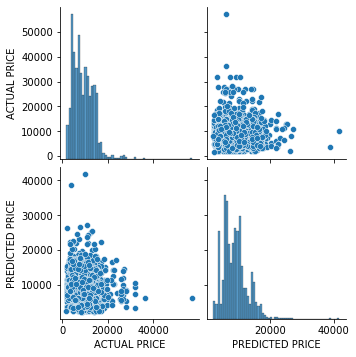

In [148]:
sns.pairplot(price)
# This marks the end of our process
# we have successfully trained our tset model to predict the price of the flight ticket,with an accuracy of ~88% by usin Ran